<a href="https://colab.research.google.com/github/remun5/campuscard/blob/master/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Data Upload:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [4]:
path = "/content/creditcard.csv" 
df = pd.read_csv(path)

### **Exploratory Analysis:**


In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df.isnull().values.any()

False

In [10]:
Fraud = df[df['Class'] == 1]
NonFraud = df[df['Class'] == 0]

In [11]:
Fraud.shape

(492, 31)

In [12]:
NonFraud.shape

(284315, 31)

In [13]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
NonFraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

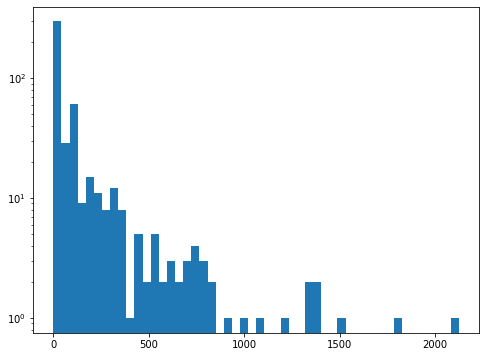

In [15]:
plt.figure(figsize = (8,6))
plt.hist(Fraud.Amount, bins = 50)
plt.yscale('log')

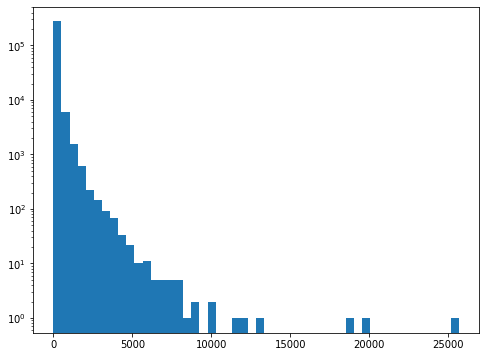

In [16]:
plt.figure(figsize = (8,6))
plt.hist(NonFraud.Amount, bins = 50)
plt.yscale('log')

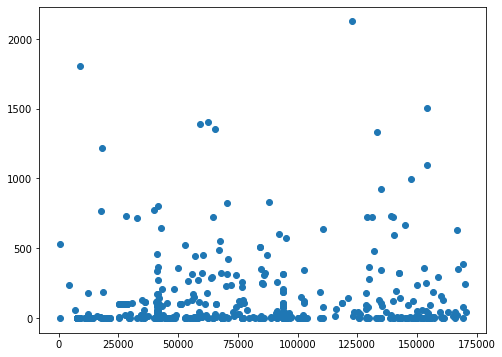

In [17]:
plt.figure(figsize = (8,6))
plt.scatter(Fraud.Time, Fraud.Amount)

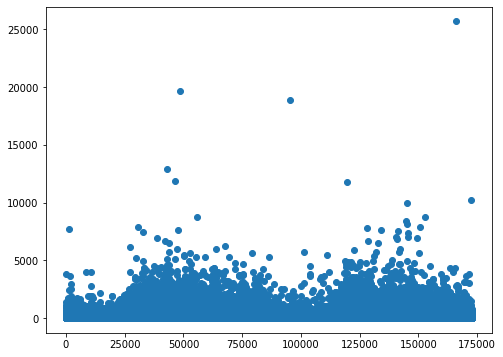

In [18]:
plt.figure(figsize = (8,6))
plt.scatter(NonFraud.Time, NonFraud.Amount)

## **Data Preprocessing:**

**Scaling the data:**


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std_scalar = StandardScaler()

In [23]:
df['scaled_amount'] = std_scalar.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scalar.fit_transform(df['Time'].values.reshape(-1,1))

In [25]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

**Undersample:**

In [29]:
n_fraud = len(df[df['Class'] == 1])

In [30]:
print(n_fraud)

492


In [33]:
fraud_indices = np.array(df[df['Class']==1].index)

In [ ]:
print(fraud_indices)

In [35]:
nonfraud_indices = np.array(df[df['Class']==0].index)

In [36]:
random_nonfraud_indices = np.array(np.random.choice(nonfraud_indices, n_fraud, replace=False))

In [39]:
undersample_indices = np.concatenate([fraud_indices, random_nonfraud_indices])

In [41]:
undersample_data = df.iloc[undersample_indices, :]

In [ ]:
undersample_data

In [43]:
undersample_data = undersample_data.sample(frac=1)

In [ ]:
undersample_data

**Feature and Target Variables:**

In [58]:
X = undersample_data.drop(['Class'], axis=1)
y = undersample_data['Class']

In [50]:
X_orig = df.drop(['Class'], axis=1)
y_orig = df['Class']

**Training and Test data:**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [81]:
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig, y_orig, test_size = .3)

In [61]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))
print('Number of total data:', len(X_train) + len(X_test))

Number of training data: 688
Number of test data: 296
Number of total data: 984


# Learning:

**Logistic Regression:**

Undersampled Data:

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score 

In [76]:
lr = LogisticRegression(C = 0.1, penalty = 'l2')
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [77]:
print('Train with Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))

Train with Logistic Regression Classifier:
Accuracy: 0.9505813953488372
Recall: 0.9190751445086706
Precision: 0.9814814814814815


In [78]:
print('Test with Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))

Test with Logistic Regression Classifier:
Accuracy: 0.9493243243243243
Recall: 0.8972602739726028
Precision: 1.0


In [79]:
print('Confusion Matrix::', confusion_matrix(y_test, y_test_pred))

Confusion Matrix:: [[150   0]
 [ 15 131]]


Actual Data:

In [82]:
lr2 = LogisticRegression(C = 0.1, penalty = 'l2')
lr2.fit(X_orig_train, y_orig_train)
y_orig_train_pred = lr2.predict(X_orig_train)
y_orig_test_pred = lr2.predict(X_orig_test)

In [83]:
print('Train with Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_orig_train, y_orig_train_pred))
print('Recall:', recall_score(y_orig_train, y_orig_train_pred))
print('Precision:', precision_score(y_orig_train, y_orig_train_pred))

Train with Logistic Regression Classifier:
Accuracy: 0.9991623362292089
Recall: 0.5885885885885885
Precision: 0.8672566371681416


In [84]:
print('Test with Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_orig_test, y_orig_test_pred))
print('Recall:', recall_score(y_orig_test, y_orig_test_pred))
print('Precision:', precision_score(y_orig_test, y_orig_test_pred))

Test with Logistic Regression Classifier:
Accuracy: 0.9992509626300574
Recall: 0.6729559748427673
Precision: 0.8991596638655462


In [85]:
print('Confusion Matrix::', confusion_matrix(y_orig_test, y_orig_test_pred))

Confusion Matrix:: [[85272    12]
 [   52   107]]


Precision: Out of the total frauds predicted, how many are actually frauds

Recall: What percentage of frauds were identified

### **Support Vector Classifier:**

In [86]:
from sklearn.svm import SVC

In [87]:
svc = SVC()
svc.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

In [88]:
print('Train with Support Vector Classifier:')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))

Train with Support Vector Classifier:
Accuracy: 0.9418604651162791
Recall: 0.8959537572254336
Precision: 0.9872611464968153


In [89]:
print('Test with Support Vector Classifier:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))

Test with Support Vector Classifier:
Accuracy: 0.9324324324324325
Recall: 0.863013698630137
Precision: 1.0
